### Exercises in Fourier Transformations

In [1]:
import numpy as np
import time
from scipy.signal import fftconvolve

import matplotlib.pyplot as plt
%matplotlib inline

Comparison of physical and Fourier space convolution methods on an ARMA(2,1) process:

In [2]:
# ARMA simulation function
def get_noise(n, var = 1, mean = 0):
    return np.random.normal(mean, np.sqrt(var), size = n)

def arma(n, phi, theta, var = 1, mean = 0):
    p, q = len(phi), len(theta)
    
    # generate initial values within |0.5| of the mean
    iv = mean + np.random.rand(max(p, q)) - 0.5
    x_t = np.empty(n, dtype=np.float64)
    x_t[:len(iv)] = iv
    
    # generate white noise terms
    w = get_noise(n, var)
    
    for i in range(len(iv), n):
        x_t[i] = (np.dot(x_t[i - p:i], phi[::-1]) + 
                  np.dot(w[i - q:i], theta[::-1]) + w[i])
    return x_t

In [3]:
# function to calculate discrete convolution in physical space
def get_convo(a, b):
    N, M = len(a), len(b)
    size = M + N - 1
    return [sum([a[n - m] * b[m] if (n - m) >= 0 and (n - m) < N else 0 
      for m in range(M)]) for n in range(size)]

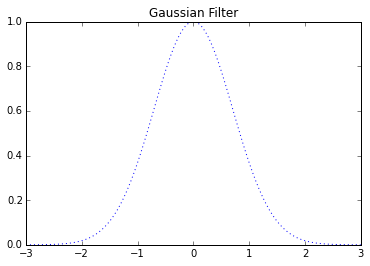

In [4]:
def g(x):
    return np.exp(-x ** 2)

# create a Gaussian filter
x_values = np.linspace(-3, 3, 100)
g_t = [g(x) for x in x_values]

plt.plot(x_values, g_t, ':')
plt.title('Gaussian Filter')

In [5]:
def convolution(space, x_t, g_t):
    start_time = time.time()
    if space == 'p':
        convo = get_convo(x_t, g_t)
    else:
        convo = fftconvolve(x_t, g_t)
    return convo, time.time() - start_time
    
def compare_routines(sig_len):
    title = 'Signal length: %s' % sig_len
    print(title + '\n' + '=' * len(title))
    
    # create an ARMA(2,1) process
    x_t = arma(sig_len, [.5, .1], [.5])
    
    # calculate the discrete convolution
    convo, convo_time = convolution('p', x_t, g_t)
    # calculate the convolution in Fourier space
    fft, fft_time = convolution('f', x_t, g_t)
    
    # Compare performance
    print('Coded routine: %.3f sec' % convo_time)
    print('Scipy routine: %.3f sec' % fft_time)
    
    # verify result similarity
    same = all(abs(convo - fft) < epsilon)
    if same:
        print('The two convolution methods are basically equivalent.\n')
    else:
        print('The two convolution methods are not equivalent.\n')

    return same
    
signal_lengths = [1000, 10000, 100000, 1000000]
epsilon = 10e-10

same = [compare_routines(sig_len) for sig_len in signal_lengths]
if all(same):
    print('The physical and Fourier space convolution methods are overall equivalent.')
else:
    print('The physical and Fourier space convolution methods are not overall equivalent.')

Signal length: 1000
Coded routine: 0.044 sec
Scipy routine: 0.000 sec
The two convolution methods are basically equivalent.

Signal length: 10000
Coded routine: 0.329 sec
Scipy routine: 0.001 sec
The two convolution methods are basically equivalent.

Signal length: 100000
Coded routine: 3.263 sec
Scipy routine: 0.008 sec
The two convolution methods are basically equivalent.

Signal length: 1000000
Coded routine: 33.251 sec
Scipy routine: 0.103 sec
The two convolution methods are basically equivalent.

The physical and Fourier space convolution methods are overall equivalent.
